## Logistic Binary Classifier를 디자인하여 Logical AND 연산 출력

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

In [3]:
X_ = np.c_[np.ones(X.shape[0]), X]
X_

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [4]:
# sigmoid 함수 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
# cross entropy

def cross_entropy(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))


In [6]:
# logistic classifier

def logistic_binary_classifier(x, theta):
    z = x.dot(theta)
    y_hat = sigmoid(z)
    return (y_hat >= 0.5).astype(int)

In [10]:
(m, n) = X_.shape

In [11]:
eta = 0.1
iterations = 1000
theta = np.random.randn(n, 1)

for _ in range(iterations):
    z = X_.dot(theta)
    y_hat = sigmoid(z)
    loss = cross_entropy(Y, y_hat)
    gradient = X_.T.dot(y_hat - Y)
    theta -= eta * gradient

In [12]:
Y_pred = logistic_binary_classifier(X_, theta)

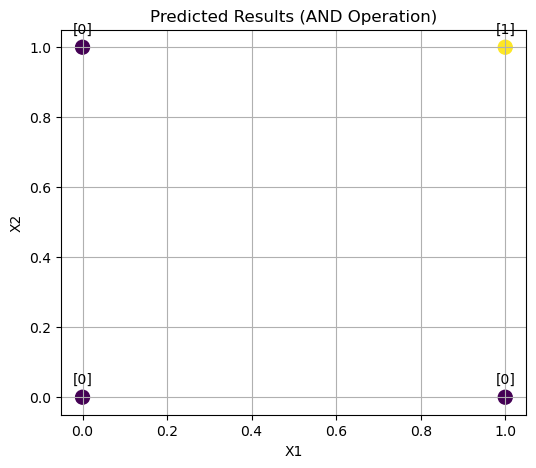

In [15]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=Y_pred, cmap='viridis', s=100)
for i, txt in enumerate(Y_pred):
    plt.annotate(str(txt), (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Predicted Results (AND Operation)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()